In [3]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.activations import relu6
import matplotlib.pyplot as plt
from keras.utils import plot_model
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [4]:
xtrain=np.load("/content/test_sign.npy")
xtrain,xtest= train_test_split(xtrain, test_size=0.1)

In [5]:
print(xtrain)
print(xtest)

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  2   1   1 ...   0   0   0]
  [  5   4  14 ...   0   0   0]
  [  7  52 160 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0  

In [6]:
xtrain=xtrain.astype('float32')/255.
xtest=xtest.astype('float32')/255.

In [7]:
#xtrain=xtrain.reshape((len(xtrain),28*28))
#xtest=xtest.reshape((len(xtest),28*28))

In [8]:
inputdim=(128,128,1)

In [9]:
codedim=3

In [10]:
inputvec=Input(shape=inputdim)

In [11]:
enc1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputvec)
enc2 = MaxPooling2D((2, 2), padding='same')(enc1)
enc3 = Conv2D(64, (3, 3), activation='relu', padding='same')(enc2)
enc4 = MaxPooling2D((2, 2), padding='same')(enc3)
encoded = Conv2D(128, (3, 3), activation='tanh', padding='same')(enc4)




In [12]:
#encode=Dense(codedim,activation='tanh') (enc3)

In [13]:
dc1 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
dc2 = UpSampling2D((2, 2))(dc1)
dc3 = Conv2D(32, (3, 3), activation='relu', padding='same')(dc2)
dc4 = UpSampling2D((2, 2))(dc3)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dc4)

In [14]:
latentvec=Model(inputvec,encoded)
autoencoder=Model(inputvec,decoded)

In [15]:
print(autoencoder.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 1)         │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,217 (723.50 KB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [17]:
hist=autoencoder.fit(xtrain,xtrain,epochs=5,batch_size=100,shuffle=True,validation_data=(xtest,xtest),callbacks=[early_stopping])

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 182s 8s/step - loss: 0.5502 - val_loss: 0.2909
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 201s 8s/step - loss: 0.2688 - val_loss: 0.2687
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 200s 8s/step - loss: 0.2520 - val_loss: 0.2631
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 174s 8s/step - loss: 0.2470 - val_loss: 0.2617
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 205s 8s/step - loss: 0.2459 - val_loss: 0.2605


In [18]:
#Visualize latent space
'''fig=plt.figure(figsize=(20,15))
plt.scatter(encd[:,0],encd[:,1],20,c=ytest[:], cmap='viridis')
plt.title('Encoded Space')
plt.ylabel('Second Encoder Dimention')
plt.xlabel('First Encoder Dimention')
plt.show()'''

"fig=plt.figure(figsize=(20,15))\nplt.scatter(encd[:,0],encd[:,1],20,c=ytest[:], cmap='viridis')\nplt.title('Encoded Space')\nplt.ylabel('Second Encoder Dimention')\nplt.xlabel('First Encoder Dimention')\nplt.show()"

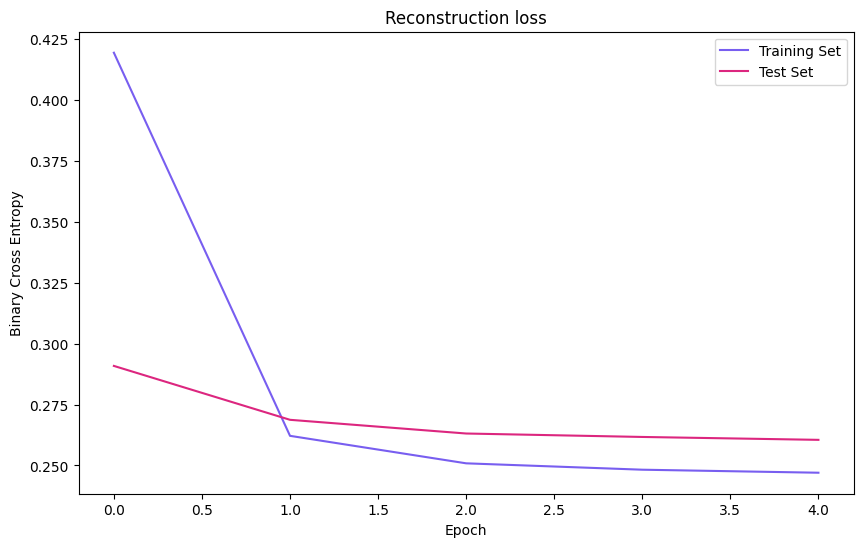

In [19]:
#Visualize loss
fig=plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],color='#785ef0')
plt.plot(hist.history['val_loss'],color='#dc267f')
plt.title('Reconstruction loss')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Training Set','Test Set'],loc='upper right')
plt.show()

In [20]:
reconstructed=autoencoder.predict(xtest)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step


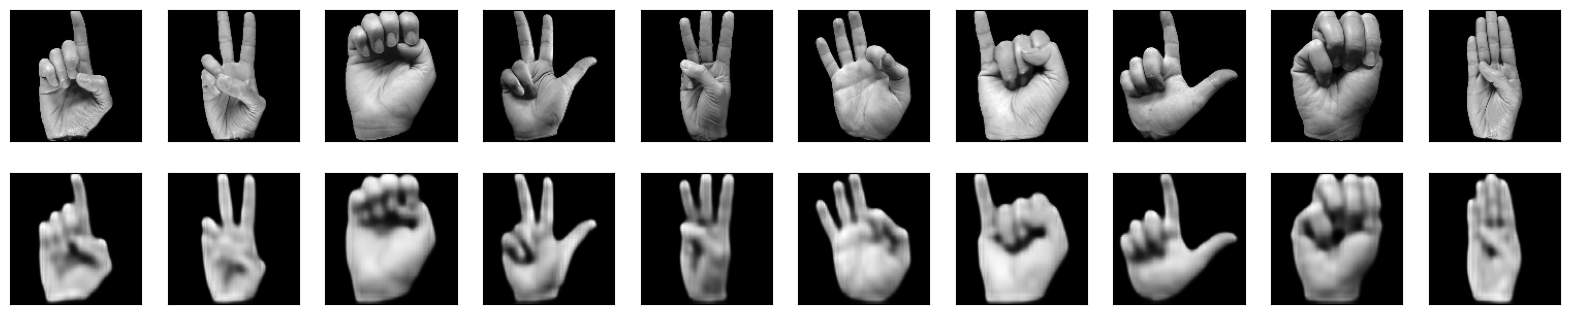

In [21]:
# Display Original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(xtest[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(reconstructed[i])
    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

**Retreiving Latent layer from the model**

In [22]:
latent_layer=Model(inputvec,encoded)
latent_img= latent_layer.predict(xtrain)

71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 334ms/step


In [24]:
latent_img_flattened=latent_img.reshape(len(latent_img),-1)
kmeans = KMeans(n_clusters=36, random_state=42)
clusters=kmeans.fit_predict(latent_img_flattened)

In [25]:
tsne = TSNE(n_components=2)
encoded_2d = tsne.fit_transform(latent_img_flattened)


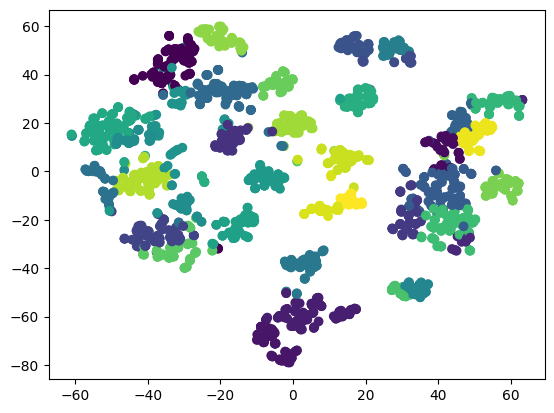

In [32]:
plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], c=clusters,cmap='viridis')

plt.show()